In [22]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [45]:
df_정보취약계층 = pd.read_excel("./자료/디지털정보화 수준.xls")

In [47]:
df_보이스피싱 = pd.read_csv("./자료/경찰청_보이스피싱 현황_20201231.csv", encoding='cp949')

In [24]:
df_개인정보침해2016_2020 = pd.read_excel("./자료/개인정보 침해 상담 건수2016~2022(월별).xlsx") # 2022년도까지 아님

In [25]:
df_개인정보침해2020_2022= pd.read_excel("./자료/개인정보 침해 상담 및 신고 건수2020~2022(월별).xlsx")

In [26]:
df_개인정보침해2016_2020

,Unnamed: 0,201601,201602,201603,201604,201605,201606,201607,201608,201609,...,201912,202001,202002,202003,202004,202005,202006,202007,202008,202009
0,- 개인정보 무단수집,199,271,607,355,163,148,175,141,112,...,291,320,253,302,215,217,280,292,328,379
1,- 개인정보 무단이용제공,233,232,287,270,258,245,295,238,258,...,430,411,467,458,413,457,559,589,540,470
2,- 주민번호등 타인정보도용,"4,230","2,922","4,427","3,399","3,860","4,031","4,051","4,103","3,647",...,"11,937","7,309","8,294","12,111","11,686","10,102","11,000","11,435","12,329","15,829"
3,- 회원탈퇴 또는 정정 요구 불응,59,82,90,55,79,102,79,69,47,...,95,87,88,126,152,116,136,133,127,145
4,- 법적용 불가 침해사례,"3,753","3,298","4,475",425,"3,581","3,780","3,001","3,004","2,388",...,792,"1,353","2,753","3,819","4,737",589,693,732,852,788
5,- 기타,402,314,416,425,386,420,643,434,302,...,362,353,467,458,383,436,599,573,451,433
6,합계,"8,876","7,119","10,302","8,283","8,253","8,656","8,244","7,989","6,754",...,"13,907","9,833","12,322","17,274","17,586","11,917","13,267","13,754","14,627","18,044"


In [27]:
df_개인정보침해2016_2020.drop([0,1,2,3,4,5], inplace=True)
df_개인정보침해2020_2022.drop([0,1,2,3,4,5,6,7,8,9,10], inplace=True)

In [28]:
df_개인정보침해2016_2020

,Unnamed: 0,201601,201602,201603,201604,201605,201606,201607,201608,201609,...,201912,202001,202002,202003,202004,202005,202006,202007,202008,202009
6,합계,"8,876","7,119","10,302","8,283","8,253","8,656","8,244","7,989","6,754",...,"13,907","9,833","12,322","17,274","17,586","11,917","13,267","13,754","14,627","18,044"


In [29]:
df_개인정보침해2020_2022

,Unnamed: 0,202009,202010,202011,202012,202101,202102,202103,202104,202105,...,202108,202109,202110,202111,202112,202201,202202,202203,202204,202205
11,합계,"17,966","13,343","15,628","19,648","19,345","15,044","20,858","19,709","17,860",...,"13,149","12,039","12,589","21,290","16,440","12,789","10,719","14,234","15,639","17,646"


In [30]:
df_개인정보침해2020_2022.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_개인정보침해2016_2020.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [31]:
df_개인정보침해2016_2020

,201601,201602,201603,201604,201605,201606,201607,201608,201609,201610,...,201912,202001,202002,202003,202004,202005,202006,202007,202008,202009
6,"8,876","7,119","10,302","8,283","8,253","8,656","8,244","7,989","6,754","7,718",...,"13,907","9,833","12,322","17,274","17,586","11,917","13,267","13,754","14,627","18,044"


In [32]:
df_개인정보침해2020_2022

,202009,202010,202011,202012,202101,202102,202103,202104,202105,202106,...,202108,202109,202110,202111,202112,202201,202202,202203,202204,202205
11,"17,966","13,343","15,628","19,648","19,345","15,044","20,858","19,709","17,860","18,426",...,"13,149","12,039","12,589","21,290","16,440","12,789","10,719","14,234","15,639","17,646"


In [33]:
df_개인정보침해2016_2020 = df_개인정보침해2016_2020.rename(index= {6:0})

In [34]:
df_개인정보침해2020_2022 = df_개인정보침해2020_2022.rename(index= {11:0})

In [35]:
df_개인정보침해= pd.concat([df_개인정보침해2016_2020,df_개인정보침해2020_2022],  axis=1, join='inner')

In [36]:
df_개인정보침해

,201601,201602,201603,201604,201605,201606,201607,201608,201609,201610,...,202108,202109,202110,202111,202112,202201,202202,202203,202204,202205
0,"8,876","7,119","10,302","8,283","8,253","8,656","8,244","7,989","6,754","7,718",...,"13,149","12,039","12,589","21,290","16,440","12,789","10,719","14,234","15,639","17,646"


In [37]:
df_개인정보침해.loc[0]= df_개인정보침해.loc[0].str.replace(",", "").astype("int")

In [38]:
x = df_개인정보침해.columns
x = x.astype(str)

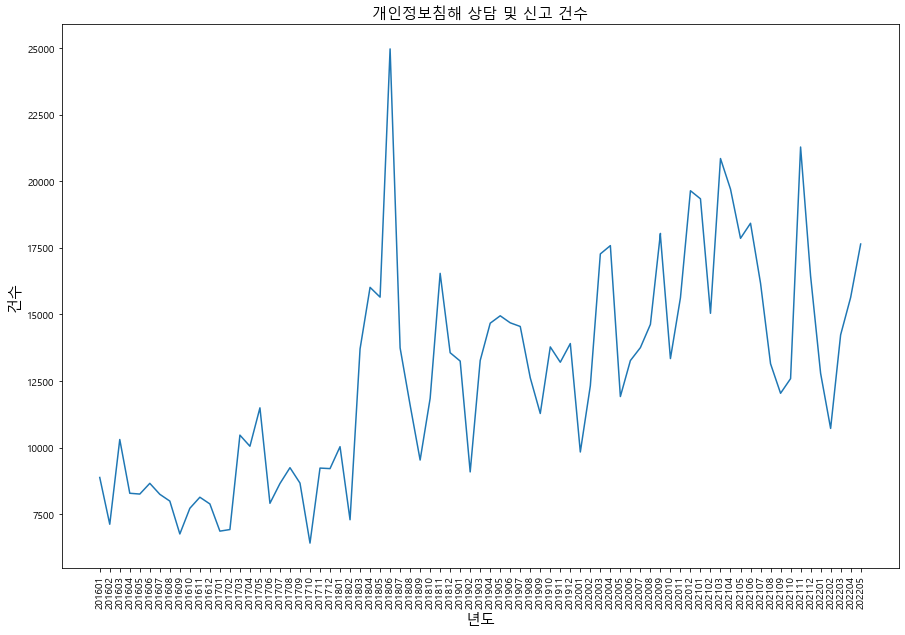

In [39]:
plt.figure(figsize=(15,10))
plt.title("개인정보침해 상담 및 신고 건수", size= 15)
plt.plot(x, df_개인정보침해.loc[0])
plt.xticks(rotation=90)
plt.xlabel("년도", size=15)
plt.ylabel("건수",size=15)
plt.show()

In [40]:
df_정보취약계층["Unnamed: 0"] = df_정보취약계층["Unnamed: 0"].astype(str)

In [41]:
df_정보취약계층.rename(columns={'Unnamed: 0' : '년도'}, inplace=True)
df_정보취약계층.dtypes

년도        object
종합 수준    float64
접근 수준    float64
역량 수준    float64
활용 수준    float64
dtype: object

In [42]:
df_정보취약계층

,년도,종합 수준,접근 수준,역량 수준,활용 수준
0,2017,65.1,91.0,51.9,65.3
1,2018,68.9,91.1,59.1,67.7
2,2019,69.9,91.7,60.2,68.8
3,2020,72.7,93.7,60.3,74.8
4,2021,75.4,94.4,63.8,77.6


In [43]:
df_정보취약계층["종합\xa0수준"].astype(int)

0    65
1    68
2    69
3    72
4    75
Name: 종합 수준, dtype: int32

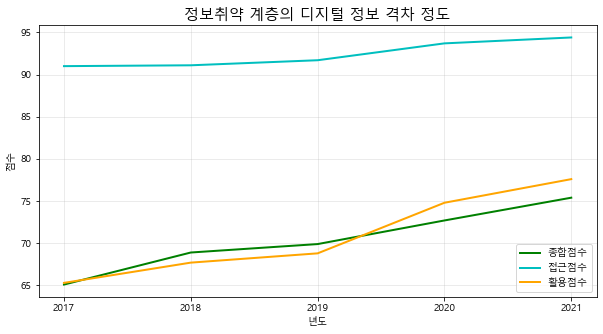

In [44]:
plt.figure(figsize=(10,5))
plt.plot(df_정보취약계층["년도"], df_정보취약계층["종합\xa0수준"], color='g', label="종합점수", lw = 2)
plt.plot(df_정보취약계층["년도"], df_정보취약계층["접근\xa0수준"], color='c', label="접근점수", lw = 2)
plt.plot(df_정보취약계층["년도"], df_정보취약계층["활용\xa0수준"], color='orange', label="활용점수",lw = 2)
plt.legend()
plt.title("정보취약 계층의 디지털 정보 격차 정도", size=15)
plt.ylabel("점수")
plt.xlabel("년도")
plt.grid(alpha=0.3)
##     접근 : PC, 모바일 스마트기기, 인터넷 접근 가능 정도
##  ** 역량 : PC, 모바일 스마트기기, 인터넷 기본적인 이용 여부
##  *** 활용 : PC, 모바일 스마트기기, 인터넷 양적, 질적 활용 정도

In [52]:
df_보이스피싱

,구분,기관사칭형_발생건수,기관사칭형_피해액_억원,기관사칭형_검거건수,기관사칭형_검거인원,대출사기형_발생건수,대출사기형_피해액_억원,대출사기형_검거건수,대출사기형_검거인원
0,2016,3384,541,3860,5682,13656,927,7526,9884
1,2017,5685,967,3776,4925,18574,1503,15842,20548
2,2018,6221,1430,4673,5491,27911,2610,25279,32133
3,2019,7219,2506,5487,6045,30448,3892,33791,42668
4,2020,7844,2144,4297,4797,23837,4856,29754,34527


In [53]:
df_보이스피싱

,구분,기관사칭형_발생건수,기관사칭형_피해액_억원,기관사칭형_검거건수,기관사칭형_검거인원,대출사기형_발생건수,대출사기형_피해액_억원,대출사기형_검거건수,대출사기형_검거인원
0,2016,3384,541,3860,5682,13656,927,7526,9884
1,2017,5685,967,3776,4925,18574,1503,15842,20548
2,2018,6221,1430,4673,5491,27911,2610,25279,32133
3,2019,7219,2506,5487,6045,30448,3892,33791,42668
4,2020,7844,2144,4297,4797,23837,4856,29754,34527


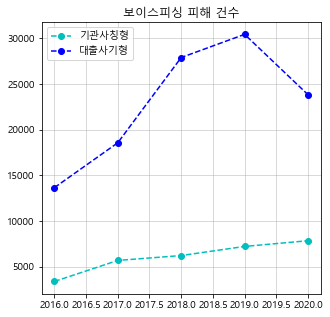

In [67]:
plt.figure(figsize=(5,5))
plt.plot(df_보이스피싱["구분"],df_보이스피싱["기관사칭형_발생건수"], "co--", label="기관사칭형")
plt.plot(df_보이스피싱["구분"], df_보이스피싱["대출사기형_발생건수"], "bo--",  label="대출사기형")
plt.grid(alpha=0.6)
plt.title("보이스피싱 피해 건수")
plt.legend()